In [3]:
from pyslise import Pyslise2D
import numpy as np
from math import sqrt, log10, log

f = 1/(2*sqrt(5))
def V(x, y):
    return x*x + y*y + f * y * (x*x- y*y/3)

p = Pyslise2D(V, -6,6, -6,6, x_symmetric=True, tolerance=1e-9, N=14, steps_per_sector=1)

In [4]:
Es = p.eigenvaluesByIndex(0,20)
Es

[(0, 1.9971895450192272, 1),
 (1, 3.9801535249900337, 2),
 (3, 5.912485991429009, 1),
 (4, 5.970652854124682, 2),
 (6, 7.851927496773082, 2),
 (8, 7.964834590389193, 1),
 (9, 7.971521798878291, 1),
 (10, 9.740288763102665, 1),
 (11, 9.797289324366611, 2),
 (13, 9.972502225723158, 2),
 (15, 11.634039441375553, 1),
 (16, 11.634055092917501, 1),
 (17, 11.734039338393762, 1),
 (18, 11.762892149172671, 1),
 (19, 11.982654487094775, 2)]

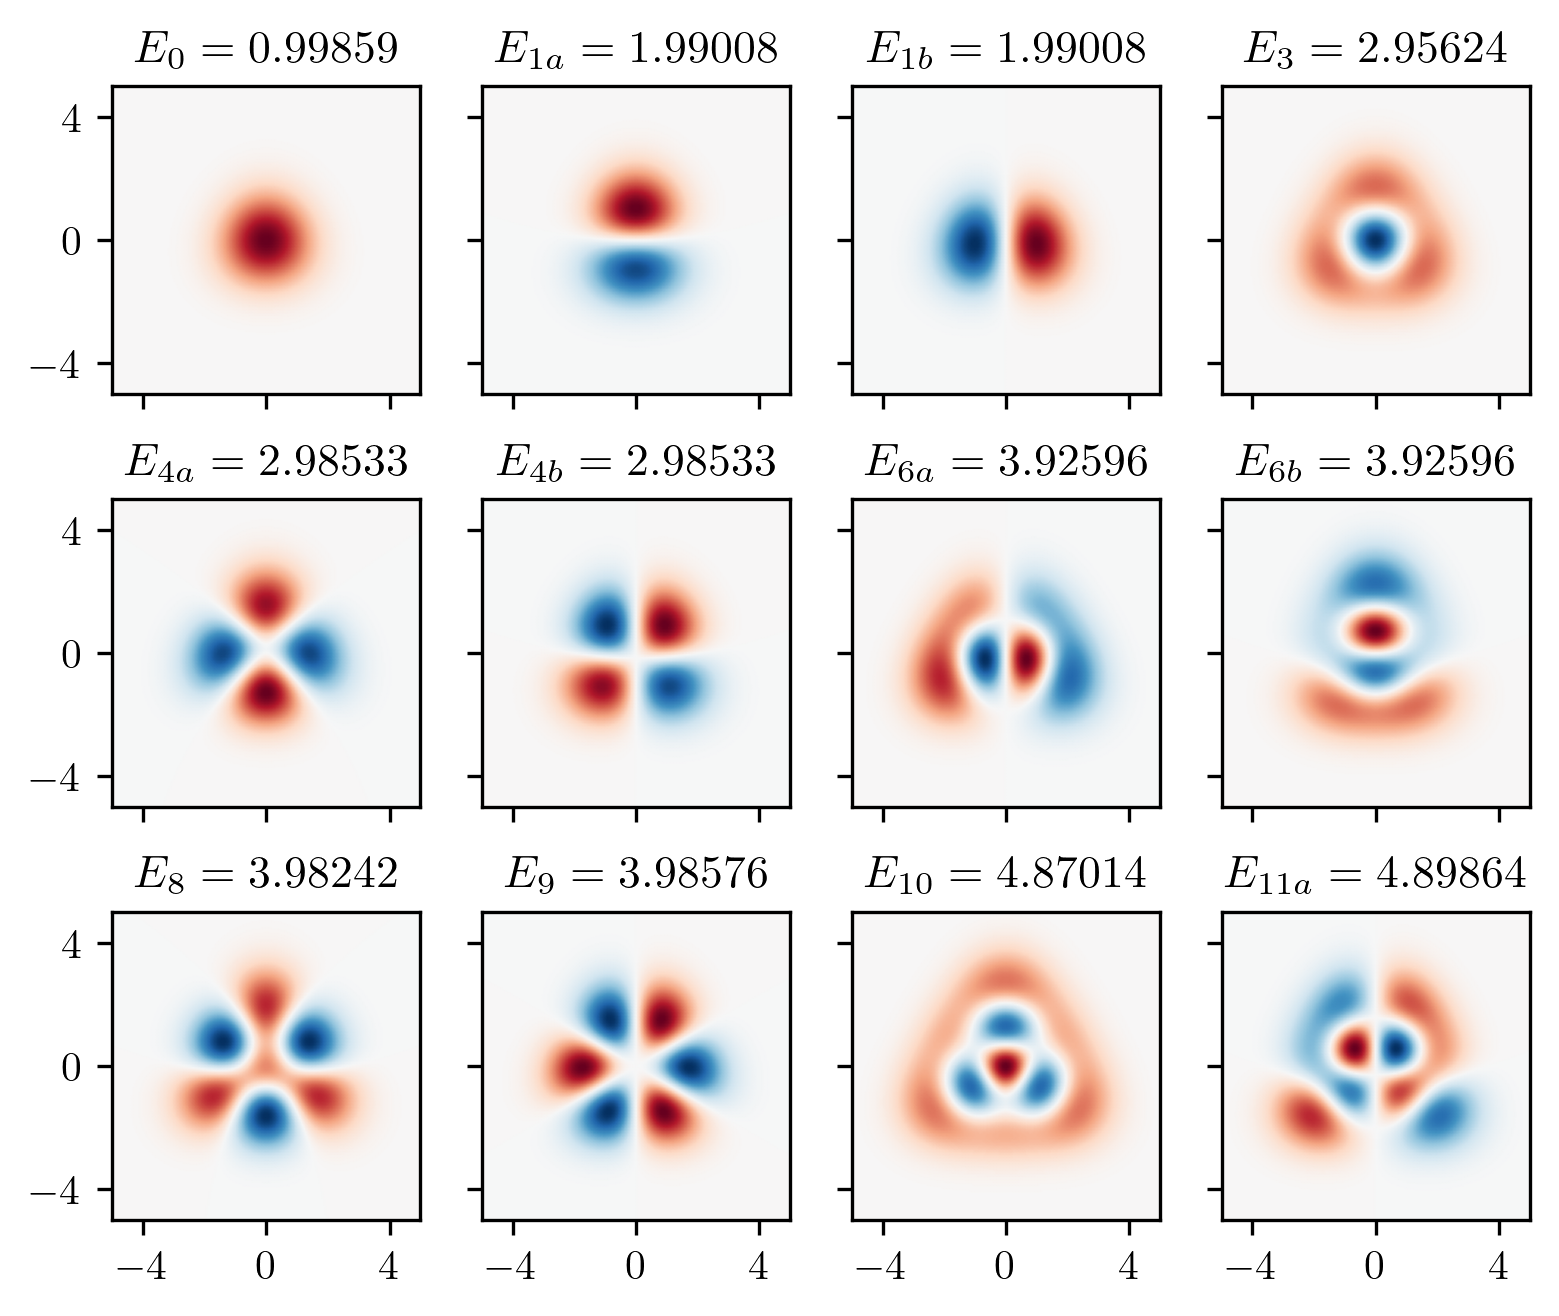

In [39]:
import matplotlib.pyplot as plt
import string
import numpy as np
import matplotlib as mpl

mpl.rc('font', family='serif', size=10, serif="Computer Modern Roman")
mpl.rc('text', usetex=True)

x = np.linspace(-5, 5, 211)
y = np.linspace(-5, 5, 211)

cols = 4
rows = 3
fig, axes = plt.subplots(
    ncols=cols, nrows=rows, figsize=(7, 4),
    dpi=300,
    sharex=True, sharey=True)
plt.subplots_adjust(right=0.8, top=1.1)

fig_index = 0
for i, E, m in Es:
    for name, f in zip(string.ascii_lowercase, p.eigenfunction(E)):
        r = fig_index//cols
        c = fig_index%cols
        if r >= rows:
            break
        z = f(x, y)
        vmax = np.max(np.abs(z))
        ax = axes[r][c]
        ax.set_xticks(ticks=[-4,0,4])
        ax.set_yticks(ticks=[-4,0,4])
        ax.set_aspect(1)
        ax.set_title(f"$E_{{{i}{'' if m == 1 else name}}} = {E/2:.5f}$", fontsize=11)
        ax.pcolormesh(x, y, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
        fig_index += 1
    else:
        continue
    break

plt.savefig("henon_heiles_eigenfunctions.png", bbox_inches='tight')